In [1]:
import numpy as np
import hippo
import cortex
import network

In [2]:
def construct_io():
    inputs = np.random.rand(20)
    inputs[-1] = 1
    inputs[:4] = (0, 0, 0, 0)
    outputs = np.copy(inputs)
    
    return inputs, outputs

def randomize_io(i, o): 
    if np.random.rand() < 0.01:
        index = 4 + int(np.random.rand() * (len(i) - 4))
        value = np.random.rand()
        i[index] = value
        o[index] = value

In [40]:
hip1 = hippo.Hippo(20, 10)
cort1 = cortex.Cortex(20, 60, 1, 10)
net1 = network.Network(hip1, cort1)
response_A = []

hip2 = hippo.Hippo(20, 10)
cort2 = cortex.Cortex(20, 60, 1, 10)
net2 = network.Network(hip2, cort2)

inputs, outputs = construct_io()
response_B = []

In [41]:
for epoch in xrange(100):
    outputs[0] = 0
    inputs[1:3] = (1, 1)
    outputs[1:3] = (1, 1)

    for trial in xrange(1,3):
        net1.forward(inputs)
        net1.backward(outputs)
        randomize_io(inputs, outputs)
    
    response_A.append(net1.cort.outputs)
    inputs[1:3] = (0, 0)
    outputs[1:3] = (0, 0)

    for trial in xrange(3, 10):
        net1.forward(inputs)
        net1.backward(outputs)
        randomize_io(inputs, outputs)

inputs[1:3] = (0, 0)
outputs[1:3] = (0, 0)
for epoch in xrange(150):
    inputs[1] = 1
    outputs[0:2] = 1

    for trial in xrange(1,2):
        net1.forward(inputs)
        net1.backward(outputs, learn=True)
        net2.forward(inputs)
        net2.backward(outputs, learn=True)
        randomize_io(inputs, outputs)
    
    response_A.append(net1.cort.outputs)
    response_B.append(net2.cort.outputs)

    inputs[1] = 0
    outputs[0:2] = 0

    for trial in xrange(2, 10):
        net1.forward(inputs)
        net1.backward(outputs, learn=True)
        net2.forward(inputs)
        net2.backward(outputs, learn=True)
        randomize_io(inputs, outputs)

[ 0.55852671]
[ 0.03078573]


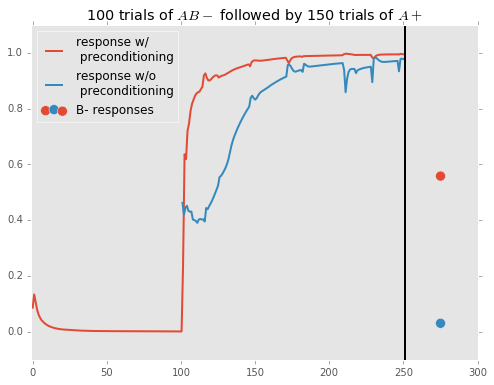

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (8, 6)
plt.style.use('ggplot')

inputs[1:3] = (0, 1)
net1.forward(inputs)
net2.forward(inputs)
print net1.cort.outputs
print net2.cort.outputs

plt.plot(np.linspace(0, 250, 250), response_A, label='response w/ \n preconditioning', linewidth=2.0)
plt.plot(np.linspace(101, 250, 150), response_B, label='response w/o \n preconditioning', linewidth=2.0)
plt.scatter([275, 275],[net1.cort.outputs, net2.cort.outputs],s=100,
            c = rcParams['axes.color_cycle'][:2],label='B- responses')
plt.legend(loc='upper left')
plt.title('100 trials of $AB- $ followed by 150 trials of $A+$')
plt.axvline(x=251, linewidth=2, color='k')
plt.ylim(-0.1, 1.1)
plt.xlim(-1, 300)
plt.axes().grid('off')
A_hp = response_A[100:][-1]
inputs[1:3] = (0, 1)
plt.savefig('figure5.pdf')

In [24]:
hip = hippo.Hippo(20, 10)
cort = cortex.Cortex(20, 60, 1, 10)
net = network.Network(hip, cort)

inputs, outputs = construct_io()
inputs[1] = 1
net.forward(inputs)
A_hnp = cort.outputs
inputs[1] = 0
response_A = []
response_B = []

In [94]:
for epoch in xrange(200):
    outputs[0] = 0
    inputs[1:3] = (1, 1)
    outputs[1:3] = (1, 1)

    for trial in xrange(1,3):
        net.forward(inputs)
        net.backward(outputs)
        randomize_io(inputs, outputs)
    
    response_A.append(net.cort.outputs)
    response_B.append(net.cort.outputs)
    inputs[1:3] = (0, 0)
    outputs[1:3] = (0, 0)

    for trial in xrange(3, 10):
        net.forward(inputs)
        net.backward(outputs)
        randomize_io(inputs, outputs)

inputs[1:3] = (0, 0)
outputs[1:3] = (0, 0)
for epoch in xrange(100):
    inputs[1:3] = (1, 0)
    outputs[0:3] = (1, 1, 0)
    
    net.forward(inputs)
    net.backward(outputs, learn=True)
    randomize_io(inputs, outputs)
    
    inputs[1:3] = (0, 1)
    outputs[0:3] = (0, 0, 1)
    
    net.forward(inputs)
    net.backward(outputs, learn=True)

    inputs[1:3] = (1, 0)
    net.forward(inputs)
    response_A.append(net.cort.outputs)
    inputs[1:3] = (0,1)
    net.forward(inputs)
    response_B.append(net.cort.outputs)
    inputs[1:3] = (0, 0)

    inputs[1] = 0
    outputs[0:2] = 0

    for trial in xrange(2, 10):
        net.forward(inputs)
        net.backward(outputs, learn=True)
        randomize_io(inputs, outputs)

ValueError: x and y must have same first dimension

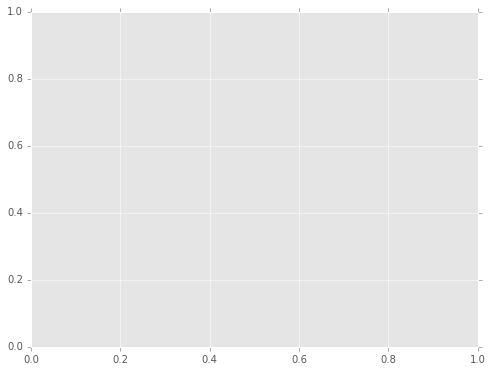

In [46]:
plt.plot(np.linspace(0, 100, 100), response_A[200:], label='Response to $A$', linewidth=2.0)
plt.plot(np.linspace(0, 100, 100), response_B[200:], label='Response to $B$', linewidth=2.0)
plt.legend(loc='lower left')
plt.title('100 trials of of $A+, B-$ without $A-, B-$ preconditioning')
plt.axes().grid('off')
plt.ylim(-0.1, 1.1)

In [100]:
cort = cortex.Cortex(20, 60, 1, 10)
response_A = []
response_B = []

inputs, outputs = construct_io() 
inputs[1] = 1
cort.forward(inputs, np.zeros(10))
A_np = cort.outputs
inputs[1] = 0

for epoch in xrange(300):
    inputs[1:3] = (1, 0)

    for trial in xrange(1,3):
        cort.forward(inputs, np.zeros(10))
        cort.backward(1)
        randomize_io(inputs, outputs)
    
    response_A.append(cort.outputs)
    inputs[1:3] = (0, 0)

    for trial in xrange(3, 5):
        cort.forward(inputs, np.zeros(10))
        cort.backward(0)
        randomize_io(inputs, outputs)
inputs[1:3] = (1, 0)
cort.forward(inputs, np.zeros(10))
A_p = np.mean(np.array(response_A))

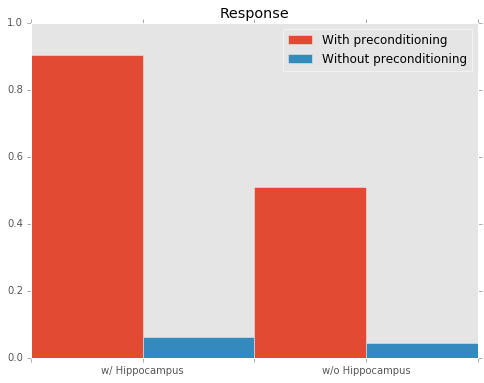

In [101]:
rcParams['figure.figsize'] = (8, 6)
vals1 = np.array([A_hp, A_p])
vals2 = np.array([A_hnp, A_np])
fig, ax = plt.subplots()

ax.bar(np.arange(2), vals1, width=0.5, color=rcParams['axes.color_cycle'][0], label='With preconditioning')
ax.bar(np.arange(2) + 0.5, vals2, width=0.5, color=rcParams['axes.color_cycle'][1], label='Without preconditioning')
ax.legend(loc='upper right')
plt.title('Response')
ax.grid('off')
ax.set_xticklabels(['', 'w/ Hippocampus', '', 'w/o Hippocampus'])
#fig.savefig('figure4.pdf')